<figure style="text-align: center;">
  <img src="_static/intro/title_page.png" style="display: block; margin: 0 auto; width: 100%;">
</figure>

### Variogram Calculation from an Image

Michael J. Pyrcz, Professor, The University of Texas at Austin 

[Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

Chapter of e-book "Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy". 

```{admonition} Cite this e-Book as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, *Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy* [e-book]. Zenodo. doi:10.5281/zenodo.15169133 [![DOI](https://zenodo.org/badge/838927017.svg)](https://doi.org/10.5281/zenodo.15169132)  
```

The workflows in this book and more are available here:

```{admonition} Cite the GeostatsPyDemos GitHub Repository as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, *GeostatsPyDemos: GeostatsPy Python Package for Spatial Data Analytics and Geostatistics Demonstration Workflows Repository* (0.0.1) [Software]. Zenodo. doi:10.5281/zenodo.12667036. GitHub Repository: https://github.com/GeostatsGuy/GeostatsPyDemos [![DOI](https://zenodo.org/badge/777871341.svg)](https://doi.org/10.5281/zenodo.12667035)



```

By Michael J. Pyrcz <br />
&copy; Copyright 2024.

This chapter is a tutorial for / demonstration of **Calculating Variograms from Images** with GeostatsPy. 

* Yes, this is a fun example as a useful tool to help students understand and interpret variograms.

* Variograms could be applied to summarize image data, but due to nonuniqueness of the result, they are more commonly used to calculate, model and check spatial continuity from sparse data or exhaustive data (e.g., seismic data) and models (simulated realizations). 

* I invite you to use your own image and calculate an interesting experimental variogram. If you make a cool example, send it to me, mpyrcz@austin.utexas.edu, and if I use it in my lectures I cite you.

**YouTube Lecture**: check out my lectures on:
        
* [Variogram Introduction](https://youtu.be/jVRLGOsnYuw?si=RD5exyGl_I_LAl4H)
* [Variogram Calculation](https://youtu.be/mzPLicovE7Q?si=-ZPgFK52h2xp1cER)
* [Variogram Parameters](https://youtu.be/NE4xfhIHAm4?si=dF18zj5_M2yVwxoD)
* [Variogram Directions](https://youtu.be/bryRCrtf3hk?si=058uFy-eTtTqwNPr)
* [Variogram Modeling](https://youtu.be/-Bi63Y3u6TU?si=-kwvFLicNTbg85xL)

For your convenience here's a summary of salient points.
    
#### Spatial Continuity 

**Spatial Continuity** is the correlation between values over distance.

* No spatial continuity – no correlation between values over distance, random values at each location in space regardless of separation distance.

* Homogenous phenomenon have perfect spatial continuity, since all values as the same (or very similar) they are correlated. 

We need a statistic to quantify spatial continuity! A convenient method is the Semivariogram.

#### The Semivariogram

Function of difference over distance.

* The expected (average) squared difference between values separated by a lag distance vector (distance and direction), $h$:

$$
\gamma(\bf{h}) = \frac{1}{2 N(\bf{h})} \sum^{N(\bf{h})}_{\alpha=1} (z(\bf{u}_\alpha) - z(\bf{u}_\alpha + \bf{h}))^2  
$$

where $z(\bf{u}_\alpha)$ and $z(\bf{u}_\alpha + \bf{h})$ are the spatial sample values at tail and head locations of the lag vector respectively.

* Calculated over a suite of lag distances to obtain a continuous function.

* the $\frac{1}{2}$ term converts a variogram into a semivariogram, but in practice the term variogram is used instead of semivariogram.
* We prefer the semivariogram because it relates directly to the covariance function, $C_x(\bf{h})$ and univariate variance, $\sigma^2_x$:

$$
C_x(\bf{h}) = \sigma^2_x - \gamma(\bf{h})
$$

Note the correlogram is related to the covariance function as:

$$
\rho_x(\bf{h}) = \frac{C_x(\bf{h})}{\sigma^2_x}
$$

The correlogram provides of function of the $\bf{h}-\bf{h}$ scatter plot correlation vs. lag offset $\bf{h}$.  

$$
-1.0 \le \rho_x(\bf{h}) \le 1.0
$$

#### Variogram Observations

The following are common observations for variograms that should assist with their practical use.

##### Observation \#1 - As distance increases, variability increase (in general).

This is common since in general, over greater distance offsets, there is often more difference between the head and tail samples.

In some cases, such as with spatial cyclicity of the hole effect variogram model the variogram may have negative slope over some lag distance intervals

Negative slopes at lag distances greater than half the data extent are often caused by too few pairs for a reliable variogram calculation

##### Observation \#2 - Calculated with over all possible pairs separated by lag vector, $\bf{𝐡}$.

We scan through the entire data set, searching for all possible pair combinations with all other data.  We then calculate the variogram as one half the expectation of squared difference between all pairs.

More pairs results in a more reliable measure.

##### Observation \#3 - Need to plot the sill to know the degree of correlation.

**Sill** is the variance, $\sigma^2_x$

Given stationarity of the variance, $\sigma^2_x$, and variogram $\gamma(\bf{h})$:

we can define the covariance function:

$$
C_x(\bf{h}) = \sigma^2_x - \gamma(\bf{h})
$$

The covariance measure is a measure of similarity over distance (the mirror image of the variogram as shown by the equation above).

Given a standardized distribution $\sigma^2_x = 1.0$, the covariance, $C_x(\bf{h})$, is equal to the correlogram, $\rho_x(\bf{h})$: 

$$
\rho_x(\bf{h}) = \sigma^2_x - \gamma(\bf{h})
$$

##### Observation \#4 - The lag distance at which the variogram reaches the sill is know as the range.

At the range, knowing the data value at the tail location provides no information about a value at the head location of the lag distance vector.

##### Observation \#5 - The nugget effect, a discontinuity at the origin

Sometimes there is a discontinuity in the variogram at distances less than the minimum data spacing.  This is known as **nugget effect**.

The ratio of nugget / sill, is known as relative nugget effect (%). Modeled as a discontinuity with no correlation structure that at lags, $h \gt \epsilon$, an infinitesimal lag distance, and perfect correlation at $\bf{h} = 0$.
Caution when including nugget effect in the variogram model as measurement error, mixing populations cause apparent nugget effect

This exercise demonstrates the semivariogram calculation with GeostatsPy. The steps include:

1. generate a 2D model with sequential Gaussian simulation
2. sample from the simulation
3. calculate and visualize experimental semivariograms

#### Detecting Directions of Spatial Continuity

Spatial continuity can be described with nested spatial continuity models:

$$
\Gamma_x(\bf{ h }) = \sum_{i=1}^{nst} \gamma_i(\bf{ h })
$$

where $\Gamma_x(\bf{h})$ is the nested variogram model resulting from the summation of $nst$ nested variograms  $\gamma_i(\bf{h})$.

Each one of these variogram structures, $\gamma_i(\bf{h})$, is based on a geometric anisotropy model parameterized by the orientation and range in the major and minor directions.  In 2D this is simply an azimuth and ranges, $azi$, $a_{maj}$ and $a_{min}$. Note, the range in the minor direction (orthogonal to the major direction.

The geometric anisotropy model assumes that the range in all off-diagonal directions is based on an ellipse with the major and minor axes aligned with and set to the major and minor for the variogram.

$$
\bf{ h } _i = \sqrt{\left(\frac{r_{maj}}{a_{maj_i}}\right)^2 + \left(\frac{r_{maj}}{a_{maj_i}}\right)^2}  
$$

Therefore, if we know the major direction, range in major and minor directions, we may completely describe each nested component of the complete spatial continuity of the variable of interest, $i = 1,\dots,nst$.

This is a fun demonstration of loading an image to a NumPy array and then calculating the variogram and variogram map of the image.

#### Load the Required Libraries

The following code loads the required libraries. 

In [3]:
import geostatspy.GSLIB as GSLIB                              # GSLIB utilities, visualization and wrapper
import geostatspy.geostats as geostats                        # GSLIB methods convert to Python      
import geostatspy
print('GeostatsPy version: ' + str(geostatspy.__version__)) 

GeostatsPy version: 0.0.72


We will also need some standard packages. These should have been installed with Anaconda 3.

In [5]:
import os                                                     # set working directory, run executables

from tqdm import tqdm                                         # suppress the status bar
from functools import partialmethod
tqdm.__init__ = partialmethod(tqdm.__init__, disable=True)

ignore_warnings = True                                        # ignore warnings?
import numpy as np                                            # ndarrays for gridded data
from numba import jit  # for numerical speed up
import pandas as pd                                           # DataFrames for tabular data
import matplotlib.pyplot as plt                               # for plotting
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator) # control of axes ticks
from matplotlib.patches import Rectangle                      # adding shape to plot
import imageio
from scipy import stats                                       # summary statistics
import math                                                   # trig etc.
import scipy.signal as signal                                 # kernel for moving window calculation
import random
plt.rc('axes', axisbelow=True)                                # plot all grids below the plot elements
if ignore_warnings == True:                                   
    import warnings
    warnings.filterwarnings('ignore')
cmap = plt.cm.inferno                                         # color map

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.  

#### Set the Working Directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time). 

In [7]:
os.chdir("c:/PGE337")                                         # set the working directory

#### Loading the Image

Load the image to an ndarray, convert to grey scale (average of RGB channels)

Image size, ny = 708 , nx = 1280


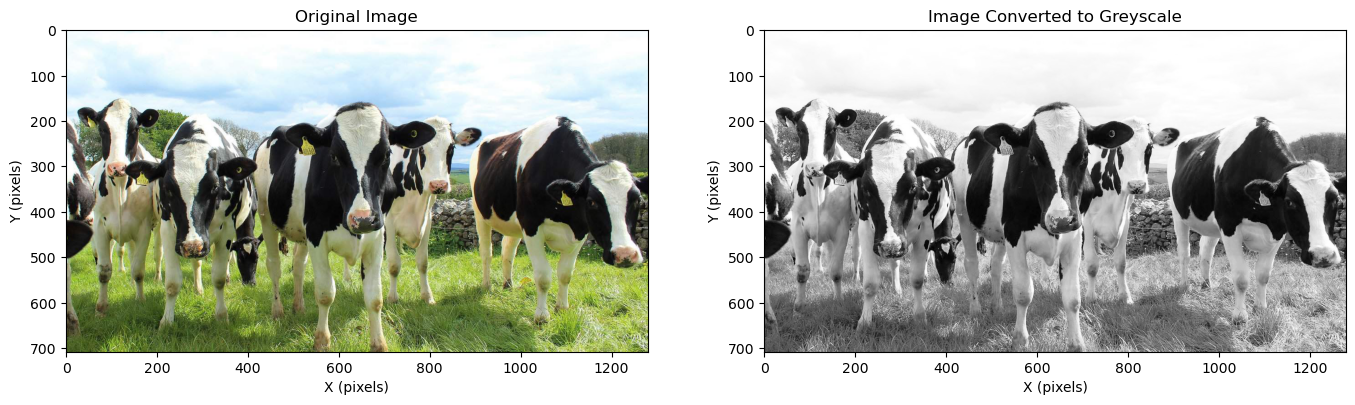

In [9]:
filename = "Holstein_heifer.jpg"                             # select the image                       
#"Holstein_heifer.jpg Image from https://agronomag.com/holstein-cows/holstein-cows-origins/#main, Agronomag

image = imageio.imread(filename)                              # read the image to a NumPy ndarray

ny = image.shape[0]                                           # determine the image size, ny and nx
nx = image.shape[1]

imageBW = np.zeros([ny,nx])                                   # make a new 2D ndarray for a black and white version

for ix in range(0, nx):                                       # this is a standard RGB to BW transform by average intensity
    for iy in range(0, ny):
        imageBW[iy,ix] = int(255) - (int(image[iy,ix,0]) + int(image[iy,ix,1]) + int(image[iy,ix,2]))/3
               
print('Image size, ny = ' + str(ny) + ' , nx = ' + str(nx))

plt.subplot(121)
plt.imshow(image)
plt.xlabel('X (pixels)'); plt.ylabel('Y (pixels)'); plt.title('Original Image')

plt.subplot(122)
plt.imshow(imageBW,cmap=plt.cm.Greys)
plt.xlabel('X (pixels)'); plt.ylabel('Y (pixels)'); plt.title('Image Converted to Greyscale')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.2, wspace=0.2, hspace=0.3); plt.show()

#### Crop the Image to Improve Stationarity

If we include the grass and blue sky we will have a very nonstationary image with the mixing of very different spatial continuity.

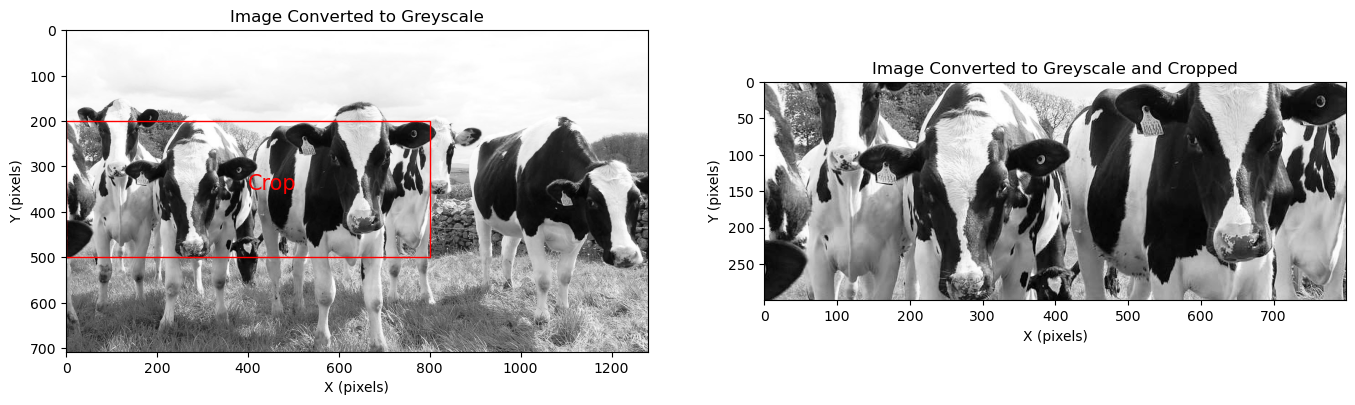

In [11]:
nys = 200; nye = 500; nxs = 0; nxe = 800             # start and end pixel numbers for the cropped image

imageBWcrop = imageBW[nys:nye,nxs:nxe]

plt.subplot(121)
plt.imshow(imageBW,cmap=plt.cm.Greys)
rect = plt.Rectangle((nxs,nys),nxe-nxs,nye-nys,linewidth=1, edgecolor='r', facecolor='none')
plt.annotate('Crop',((nxe+nxs)*0.5,((nye+nys)*0.5)),color='red',fontsize=15)
plt.gca().add_patch(rect)
plt.xlabel('X (pixels)'); plt.ylabel('Y (pixels)'); plt.title('Image Converted to Greyscale')

plt.subplot(122)
plt.imshow(imageBWcrop,cmap=plt.cm.Greys)
plt.xlabel('X (pixels)'); plt.ylabel('Y (pixels)'); plt.title('Image Converted to Greyscale and Cropped')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.2, wspace=0.2, hspace=0.3); plt.show()

#### Calculate Directional Variograms

Use GeostatsPy's gam function to calculated directional variograms for gridded, exhaustive data

* warning this calculation may take a couple minutes

In [13]:
nlagx,variox,nppx = geostats.gam(imageBWcrop,tmin=-9999,tmax=9999,xsiz=1.0,ysiz=1.0,ixd=2,iyd=0,nlag=350,isill=1.0) # x
nlagy,varioy,nppy = geostats.gam(imageBWcrop,tmin=-9999,tmax=9999,xsiz=1.0,ysiz=1.0,ixd=0,iyd=2,nlag=150,isill=1.0) # y

#### Plot the Image and Directional Variograms

To interpret the image's spatial continuity we plot the cropped, grey-scale image and experimental, directional variograms together.

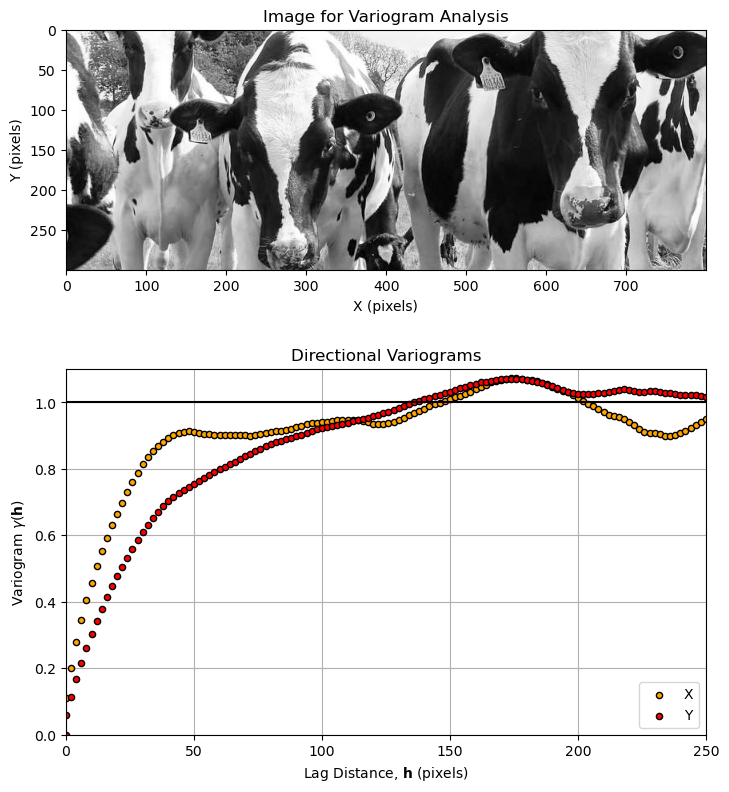

In [15]:
plt.subplot(211)
plt.imshow(imageBWcrop,cmap=plt.cm.Greys)
plt.xlabel('X (pixels)'); plt.ylabel('Y (pixels)'); plt.title('Image for Variogram Analysis')

plt.subplot(212)
plt.scatter(nlagx,variox,s=20,color='orange',edgecolor='black',label='X')
plt.scatter(nlagy,varioy,s=20,color='red',edgecolor='black',label='Y')
plt.plot([0,250],[1,1],color='black')
plt.xlabel(r'Lag Distance, $\bf{h}$ (pixels)'); plt.ylabel(r'Variogram $\gamma$($\bf{h}$)'); plt.title('Directional Variograms')
plt.xlim([0,250]); plt.ylim([0,1.1]); plt.grid(); plt.legend(loc='lower right')

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.6, wspace=0.2, hspace=0.1); plt.show()

Can you see it? Do you see the matrix in the cows, Neo? 

* excuse the Matrix movie reference
* **y direction / vertical** - longer spatial continuity range
* **x direction / horizontal** - shorter spatial continuity range and more cyclicity

It makes sense given the patterns on these cows, black and white blotches that have greater extent in the vertical direction. This was a fun demonstration of calculating spatial continuity from an image with GeostatsPy.

#### Comments

This was a basic demonstration of variogram calculation from an image with GeostatsPy. Much more can be done, I have other demonstrations for modeling workflows with GeostatsPy in the GitHub repository [GeostatsPy_Demos](https://github.com/GeostatsGuy/GeostatsPy_Demos/tree/main). 

For example, check out my: 

* [interactive variogram calculation dashboard](https://github.com/GeostatsGuy/DataScienceInteractivePython/blob/main/Interactive_Variogram_Calculation.ipynb)
* [interactive variogram modeling dashboard](https://github.com/GeostatsGuy/DataScienceInteractivePython/blob/main/Interactive_Variogram_Modeling.ipynb)

I hope this is helpful,

*Michael*

#### About the Author

<figure style="text-align: center;">
  <img src="_static/intro/michael_pyrcz_officeshot_jacket.jpg" style="display: block; margin: 0 auto; width: 70%;">
  <figcaption style="text-align: center;"> Professor Michael Pyrcz in his office on the 40 acres, campus of The University of Texas at Austin.
</figcaption>
</figure>

Michael Pyrcz is a professor in the [Cockrell School of Engineering](https://cockrell.utexas.edu/faculty-directory/alphabetical/p), and the [Jackson School of Geosciences](https://www.jsg.utexas.edu/researcher/michael_pyrcz/), at [The University of Texas at Austin](https://www.utexas.edu/), where he researches and teaches subsurface, spatial data analytics, geostatistics, and machine learning. Michael is also,

* the principal investigator of the [Energy Analytics](https://fri.cns.utexas.edu/energy-analytics) freshmen research initiative and a core faculty in the Machine Learn Laboratory in the College of Natural Sciences, The University of Texas at Austin

* an associate editor for [Computers and Geosciences](https://www.sciencedirect.com/journal/computers-and-geosciences/about/editorial-board), and a board member for [Mathematical Geosciences](https://link.springer.com/journal/11004/editorial-board), the International Association for Mathematical Geosciences. 

Michael has written over 70 [peer-reviewed publications](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en), a [Python package](https://pypi.org/project/geostatspy/) for spatial data analytics, co-authored a textbook on spatial data analytics, [Geostatistical Reservoir Modeling](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) and author of two recently released e-books, [Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) and [Applied Machine Learning in Python: a Hands-on Guide with Code](https://geostatsguy.github.io/MachineLearningDemos_Book/intro.html).

All of Michael’s university lectures are available on his [YouTube Channel](https://www.youtube.com/@GeostatsGuyLectures) with links to 100s of Python interactive dashboards and well-documented workflows in over 40 repositories on his [GitHub account](https://github.com/GeostatsGuy), to support any interested students and working professionals with evergreen content. To find out more about Michael’s work and shared educational resources visit his [Website](www.michaelpyrcz.com).

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PI is Professor John Foster)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Professor, Cockrell School of Engineering and The Jackson School of Geosciences, The University of Texas at Austin

More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)